### Library of model

In [123]:
import pandas as pd
from pandas import read_csv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [124]:
from tensorflow.keras.models import Sequential
#sequential data reader

from tensorflow.keras.layers import LSTM
#Long short term memory

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
#Dense is a fully connected layer or FFNN(feedforward neural network).


In [125]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

### Data Set: APPL(Apple stock: 01/01/2014-06/30/2019)
from https://finance.yahoo.com/quote/AAPL/history/

In [126]:
dir_path_dataset_1 = 'AAPL.csv'

### Load Dataset

In [127]:
df_all = pd.read_csv(dir_path_dataset_1)
df_all.head(5)
#Adj close = the closing price excluded dividend and split effect

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.542171,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,17.156841,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.250401,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,17.127035,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.235500,258529600


### Brief Exploratory Data Analysis (EDA)

In [128]:
df_all.shape

(1382, 7)

In [129]:
df_all.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [130]:
df_all.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1.382000e+03
mean,33.948871,34.247564,33.653907,33.959740,32.028576,1.670774e+08
std,9.725011,9.820676,9.635296,9.729731,9.981307,9.220445e+07
min,17.684999,17.911785,17.626785,17.849285,15.850214,4.590360e+07
25%,26.586875,26.826250,26.304375,26.501875,24.513500,1.045275e+08
50%,31.481250,31.712499,31.213750,31.458751,28.722552,1.423682e+08
75%,42.462499,42.804375,42.068751,42.324376,40.647752,2.034164e+08
max,57.695000,58.367500,57.445000,58.017502,56.208157,1.065523e+09


### Keep Only "Close" (for Closing Price) and Filter Our All Other Attributes

In [131]:
df = df_all.iloc[:,4:5]
# this will take close price to store at df

In [132]:
df.head()

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286


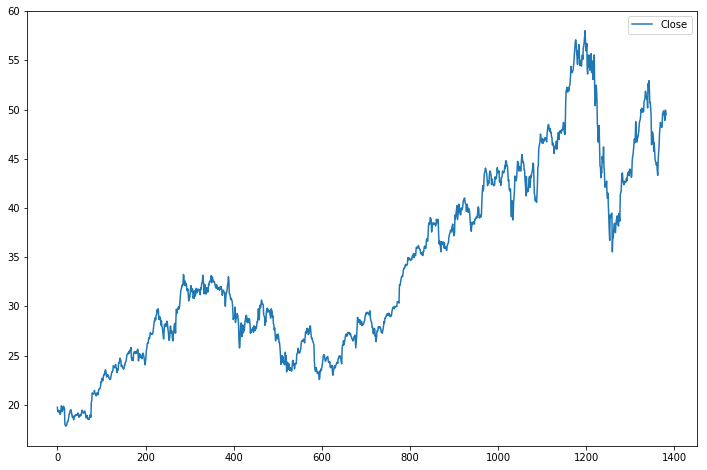

In [133]:
df.plot(figsize=(12,8))

### Lenght of Input Time Series - Number of input Time Steps

In [134]:
#Set the Lenght of the input sequence
length60 = 60

In [135]:
length60

60

### Time series Dataset: Train/ test split

In [136]:
len(df)

1382

In [137]:
# set percentage of data used for testing
test_percent = 0.1
#10% of dataset is for testing

In [138]:
len(df)*test_percent

138.20000000000002

### Split Data --> Train/Test

In [139]:
test_length = np.round(len(df)*test_percent)
test_length

138.0

In [140]:
#testing dataset starts at the index
split_index = int(len(df)-test_length)
split_index

1244

In [141]:
data_train = df.iloc[:split_index]
data_test = df.iloc[split_index - length60 :]
#the last 60 data of the training dataset until the end of the data to test the model

In [142]:
data_train.head(5)

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286


In [143]:
data_train.tail(5)

,Close
1239,46.205002
1240,44.172501
1241,43.680000
1242,42.122501
1243,42.400002


In [144]:
data_test.head(5)
#1244 - 60 = 1144

,Close
1184,55.959999
1185,54.470001
1186,54.560001
1187,54.592499
1188,55.007500


In [145]:
data_test.tail(5)

,Close
1377,49.645000
1378,48.892502
1379,49.950001
1380,49.935001
1381,49.480000


### Normaliza Data(Scale it into the range [0,1])

In [146]:
scaler = MinMaxScaler()

In [147]:
scaler.fit(data_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [148]:
normalized_train = scaler.transform(data_train)
normalized_test = scaler.transform(data_test)
#transform the value in normal[0,1]

### Create TimeseriesGenerate for Training

In [149]:
#Time series has 60 historical data point
batch_size32 = 32


train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length60, batch_size = batch_size32)
#TimeseriesGenerator(input,outputs, length, batch_size)


In [150]:
#This project generate 1183 times = 1244 - 60 -1
len(normalized_train)

1244

In [151]:
len(train_tsGenerator60)
#batch generated by time series generator from 1244
#last that left from generate sequnce processes
#This project generate 1183 times = 1244 - 60 -1
# 1183/32 each batch has 32 samples

37

In [152]:
X,y = train_tsGenerator60[0]
print(X)

[[[0.04743444]
  [0.0366317 ]
  [0.03925457]
  ...
  [0.03556474]
  [0.03350198]
  [0.0329685 ]]

 [[0.0366317 ]
  [0.03925457]
  [0.03579594]
  ...
  [0.03350198]
  [0.0329685 ]
  [0.03286185]]

 [[0.03925457]
  [0.03579594]
  [0.0388367 ]
  ...
  [0.0329685 ]
  [0.03286185]
  [0.03722739]]

 ...

 [[0.03969917]
  [0.03930789]
  [0.04108617]
  ...
  [0.08228787]
  [0.07842912]
  [0.07625081]]

 [[0.03930789]
  [0.04108617]
  [0.03342197]
  ...
  [0.07842912]
  [0.07625081]
  [0.08273247]]

 [[0.04108617]
  [0.03342197]
  [0.02789165]
  ...
  [0.07625081]
  [0.08273247]
  [0.0835593 ]]]


In [153]:
print(y)

[[0.03286185]
 [0.03722739]
 [0.03802758]
 [0.03468451]
 [0.02848732]
 [0.0210632 ]
 [0.02103656]
 [0.02715371]
 [0.02107213]
 [0.01763125]
 [0.01947174]
 [0.01616417]
 [0.01709777]
 [0.0223702 ]
 [0.02790945]
 [0.02838067]
 [0.02220131]
 [0.06045115]
 [0.06415881]
 [0.08385276]
 [0.08228787]
 [0.08029625]
 [0.08153217]
 [0.08251013]
 [0.08996095]
 [0.08413729]
 [0.08228787]
 [0.07842912]
 [0.07625081]
 [0.08273247]
 [0.0835593 ]
 [0.08365711]]


## Build Train and Test

In [154]:
n_features = 1
#feature has 1 preditor

In [155]:
#define the model
model = Sequential()

model.add(LSTM(units=50, activation='relu',return_sequences=True, input_shape=(length60,n_features)))
#return_sequences=True will return the value to next LSTM layer
#input_shape=(length60,n_features) = input demension is 2 demensions.
model.add(Dropout(0.2))
#dropout 20% of the all data

model.add(LSTM(units=50, activation='relu',return_sequences=True))
#learning funciton to fullfill the dropped data.
#return_sequences=True will return the value to next LSTM layer
model.add(Dropout(0.2))

model.add(LSTM(units=50, activation='relu'))
#learning funciton to fullfill the dropped data.

model.add(Dense(1))

### complie model

In [156]:
model.compile(optimizer = 'adam', loss ='mse')
#complie Adaptive Moment Estimation (adam) and loss function to monitor the model

model.summary()
#summmarize the model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
__________________________________________________

### Train(Fit) model Using fit_generator()

In [157]:
model.fit_generator(train_tsGenerator60, epochs=100)

Epoch 1/100
37/37 [==============================] - 12s 329ms/step - loss: 0.0739
Epoch 2/100
37/37 [==============================] - 6s 170ms/step - loss: 0.0179
Epoch 3/100
37/37 [==============================] - 6s 175ms/step - loss: 0.0160
Epoch 4/100
37/37 [==============================] - 7s 176ms/step - loss: 0.0185
Epoch 5/100
37/37 [==============================] - 6s 161ms/step - loss: 0.0035
Epoch 6/100
37/37 [==============================] - 6s 161ms/step - loss: 0.0029
Epoch 7/100
37/37 [==============================] - 6s 161ms/step - loss: 0.0030
Epoch 8/100
37/37 [==============================] - 6s 163ms/step - loss: 0.0028
Epoch 9/100
37/37 [==============================] - 6s 160ms/step - loss: 0.0020
Epoch 10/100
37/37 [==============================] - 6s 163ms/step - loss: 0.0021
Epoch 11/100
37/37 [==============================] - 6s 160ms/step - loss: 0.0021
Epoch 12/100
37/37 [==============================] - 6s 160ms/step - loss: 0.0030
Epoch 13/100

37/37 [==============================] - 7s 180ms/step - loss: 0.0012
Epoch 100/100
37/37 [==============================] - 7s 188ms/step - loss: 0.0015


### Visualize the model

In [158]:
loss_history_keys = model.history.history.keys()

loss_history_keys

dict_keys(['loss'])

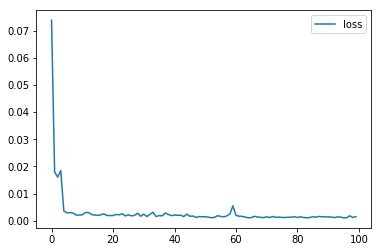

In [159]:
df_model_loss = pd.DataFrame(model.history.history)

df_model_loss.plot()

## prediction for Testing: Using TimeseriesGenerator

In [160]:
batch_size1 =1 
# In a timeserise batch has 1 dataset

test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=length60, batch_size = batch_size1)
#TimeseriesGenerator(input,outputs, length, batch_size)

### Predict Future Data Points for Testing

### Create TimeriesGenerator for Testing

In [161]:
normalized_prediction = model.predict_generator(test_tsGenerator60)
# predict the time series

In [162]:
normalized_prediction
#138 data point (predicted value)

array([[0.6447373 ],
       [0.6375897 ],
       [0.629339  ],
       [0.6216922 ],
       [0.6137388 ],
       [0.60535204],
       [0.5976922 ],
       [0.589712  ],
       [0.5804311 ],
       [0.5684387 ],
       [0.55334044],
       [0.5396569 ],
       [0.52871495],
       [0.5211103 ],
       [0.5172363 ],
       [0.51663226],
       [0.51353   ],
       [0.5088094 ],
       [0.5029967 ],
       [0.49764013],
       [0.49422187],
       [0.4931597 ],
       [0.4937145 ],
       [0.49453217],
       [0.49602556],
       [0.49861544],
       [0.50232685],
       [0.50701624],
       [0.51104563],
       [0.51403433],
       [0.51550084],
       [0.51715314],
       [0.51889104],
       [0.5201186 ],
       [0.52402353],
       [0.5310775 ],
       [0.54031086],
       [0.5517749 ],
       [0.5652728 ],
       [0.5798103 ],
       [0.5933318 ],
       [0.60403484],
       [0.61104566],
       [0.6150627 ],
       [0.6165305 ],
       [0.6163655 ],
       [0.61513925],
       [0.613

In [163]:
len(normalized_prediction)

138

In [164]:
prediction = scaler.inverse_transform(normalized_prediction)
#convert the predicted value to be true value

In [165]:
prediction_index =np.arange(1244,1382,step=1)
#1244 data poiints + 138 data points in the testing data = 1382 data points

df_prediction = pd.DataFrame(data = prediction, index=prediction_index, columns=['Prediction'])
#index will predict from 1244 to 1382

In [166]:
df_prediction

,Prediction
1244,43.747234
1245,43.460125
1246,43.128708
1247,42.821548
1248,42.502075
...,...
1377,48.322384
1378,48.469120
1379,48.525406
1380,48.561275


### Visualization

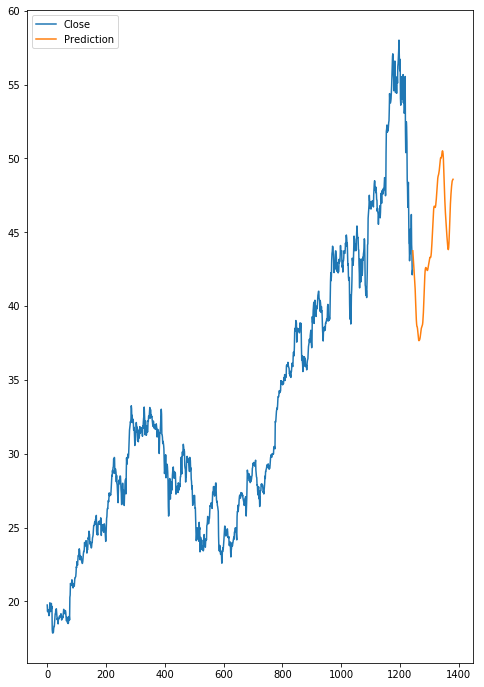

In [167]:
ax = data_train.plot()

df_prediction.plot(ax=ax, figsize=(8,12))
# orange is predicted value
#blue is real value that train the dataset

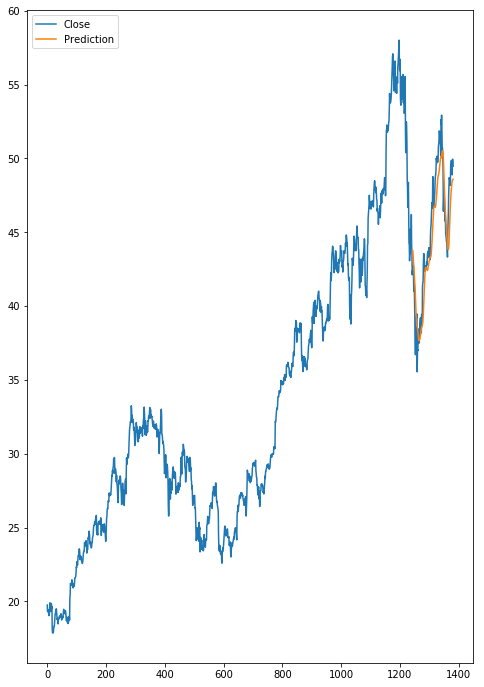

In [168]:
ax = df.plot()

df_prediction.plot(ax=ax, figsize=(8,12))
# orange is predicted value
#blue is real value

## Time Series Forecasting with LSTM

forecast the future
should employ all the avaliable data
Not split the data into training/testing

### Preprocesses Full Input Dataset

In [169]:
full_scaler = MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)

### Create TimeSeriesGenerator for Forecasting

In [170]:
length60

60

In [171]:
# the batch =32
forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length = length60, batch_size = batch_size32)

### Build, Complie, and Fit LSTM Model for Forecasting

In [172]:
model.fit_generator(forecast_tsGenerator, epochs = 100)
#The hold dataset from the website is 42 dataset

Epoch 1/100
42/42 [==============================] - 7s 163ms/step - loss: 0.0015
Epoch 2/100
42/42 [==============================] - 7s 160ms/step - loss: 0.0017
Epoch 3/100
42/42 [==============================] - 7s 161ms/step - loss: 0.0015
Epoch 4/100
42/42 [==============================] - 7s 160ms/step - loss: 9.9594e-04
Epoch 5/100
42/42 [==============================] - 7s 161ms/step - loss: 0.0013
Epoch 6/100
42/42 [==============================] - 7s 161ms/step - loss: 0.0011
Epoch 7/100
42/42 [==============================] - 7s 164ms/step - loss: 0.0021
Epoch 8/100
42/42 [==============================] - 7s 161ms/step - loss: 0.0016
Epoch 9/100
42/42 [==============================] - 7s 161ms/step - loss: 0.0015
Epoch 10/100
42/42 [==============================] - 7s 160ms/step - loss: 0.0012
Epoch 11/100
42/42 [==============================] - 7s 162ms/step - loss: 0.0013
Epoch 12/100
42/42 [==============================] - 7s 161ms/step - loss: 0.0011
Epoch 13/

42/42 [==============================] - 7s 173ms/step - loss: 9.9947e-04
Epoch 98/100
42/42 [==============================] - 7s 170ms/step - loss: 0.0015
Epoch 99/100
42/42 [==============================] - 7s 169ms/step - loss: 8.3142e-04
Epoch 100/100
42/42 [==============================] - 7s 173ms/step - loss: 8.6601e-04


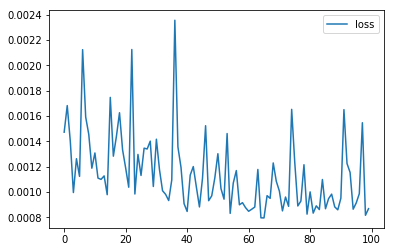

In [193]:
loss_history_keys = model.history.history.keys()

loss_history_keys
df_model_loss = pd.DataFrame(model.history.history)

df_model_loss.plot()

### Time Series Forecasting with LSTM Neural Network: 07/01/2019-12/15/2019

In [173]:
forecast = []
periods = 117
#117 days business days (07/01/2019-12/15/2019)

first_eval_batch = normalized_full_data[-length60:]
current_batch = first_eval_batch.reshape((1,length60,n_features))
#The last 60 dataset is the first batch

for i in range(periods):
    #get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    #store prediction
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

### Invese to Transform Normalized Data Back into True Values

In [175]:
forecast = full_scaler.inverse_transform(forecast)
forecast

array([[49.79246335],
       [49.85305129],
       [49.94342083],
       [50.05000159],
       [50.16172751],
       [50.27197859],
       [50.3778339 ],
       [50.47875713],
       [50.57535881],
       [50.6686014 ],
       [50.75934444],
       [50.84821282],
       [50.93554889],
       [51.02151069],
       [51.10613652],
       [51.18940244],
       [51.27127492],
       [51.3517013 ],
       [51.43066721],
       [51.5081535 ],
       [51.58415537],
       [51.65867762],
       [51.73172504],
       [51.80330002],
       [51.8734241 ],
       [51.94208772],
       [52.00931481],
       [52.07511255],
       [52.13948334],
       [52.20245112],
       [52.26402308],
       [52.32421597],
       [52.38303937],
       [52.44051484],
       [52.49665911],
       [52.55148418],
       [52.60500919],
       [52.65725809],
       [52.70824044],
       [52.7579802 ],
       [52.80649652],
       [52.85380855],
       [52.89993784],
       [52.94490115],
       [52.98871763],
       [53

In [176]:
df

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286
...,...
1377,49.645000
1378,48.892502
1379,49.950001
1380,49.935001


In [177]:
### Create new timestamp index with pandas:07/01/2019-12/15/2019

In [178]:
forecast_index = np.arange(1382,1499, step=1)

In [179]:
forecast_df = pd.DataFrame(data=forecast, index = forecast_index, columns=['Forecast'])

In [180]:
forecast_df

,Forecast
1382,49.792463
1383,49.853051
1384,49.943421
1385,50.050002
1386,50.161728
...,...
1494,54.285947
1495,54.291495
1496,54.296865
1497,54.302072


### plot the forecast

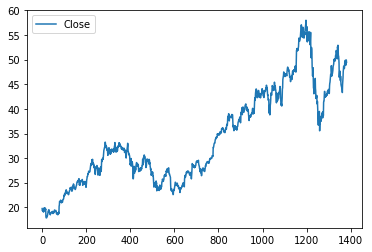

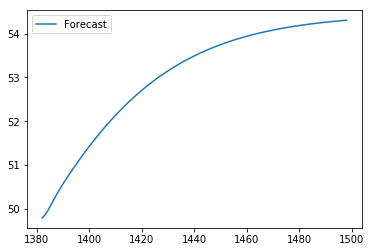

In [181]:
df.plot()
forecast_df.plot()

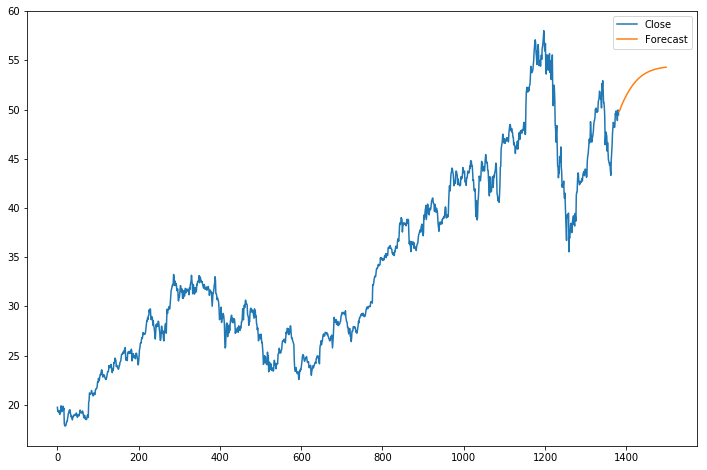

In [182]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize=(12,8))

In [183]:
dir_path_dataset_2 = 'AAPL(20190701_20191215).csv'

In [184]:
df_all_JUL_DEC_2019 = pd.read_csv(dir_path_dataset_2)

In [185]:
df_all_JUL_DEC_2019.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-01,50.792500,51.122501,50.162498,50.387501,49.385983,109012000
1,2019-07-02,50.352501,50.782501,50.340000,50.682499,49.675121,67740800
2,2019-07-03,50.820000,51.110001,50.672501,51.102501,50.086777,45448000
3,2019-07-05,50.837502,51.270000,50.724998,51.057499,50.042667,69062000
4,2019-07-08,50.202499,50.349998,49.602501,50.005001,49.011086,101354400


In [186]:
df_JUL_DEC_2019 = df_all_JUL_DEC_2019.iloc[:,4:5]

In [187]:
df_JUL_DEC_2019

,Close
0,50.387501
1,50.682499
2,51.102501
3,51.057499
4,50.005001
...,...
112,66.730003
113,67.120003
114,67.692497
115,67.864998


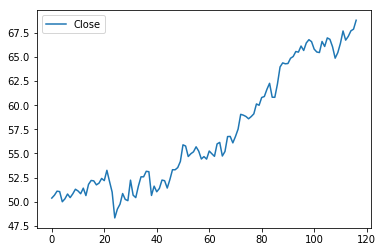

In [188]:
df_JUL_DEC_2019.plot()

In [189]:
forecast_df['Forecast'].values

array([49.79246335, 49.85305129, 49.94342083, 50.05000159, 50.16172751,
       50.27197859, 50.3778339 , 50.47875713, 50.57535881, 50.6686014 ,
       50.75934444, 50.84821282, 50.93554889, 51.02151069, 51.10613652,
       51.18940244, 51.27127492, 51.3517013 , 51.43066721, 51.5081535 ,
       51.58415537, 51.65867762, 51.73172504, 51.80330002, 51.8734241 ,
       51.94208772, 52.00931481, 52.07511255, 52.13948334, 52.20245112,
       52.26402308, 52.32421597, 52.38303937, 52.44051484, 52.49665911,
       52.55148418, 52.60500919, 52.65725809, 52.70824044, 52.7579802 ,
       52.80649652, 52.85380855, 52.89993784, 52.94490115, 52.98871763,
       53.03141362, 53.07300827, 53.11352073, 53.15297256, 53.19138052,
       53.22876854, 53.26515817, 53.30057096, 53.33502847, 53.36853786,
       53.40114464, 53.4328488 , 53.46367907, 53.49365221, 53.5227826 ,
       53.55110134, 53.57862041, 53.60536377, 53.63134336, 53.65658554,
       53.68109988, 53.70491272, 53.72803123, 53.75048894, 53.77

         Close   Forecast
0    50.387501  49.792463
1    50.682499  49.853051
2    51.102501  49.943421
3    51.057499  50.050002
4    50.005001  50.161728
..         ...        ...
112  66.730003  54.285947
113  67.120003  54.291495
114  67.692497  54.296865
115  67.864998  54.302072
116  68.787498  54.307110

[117 rows x 2 columns]


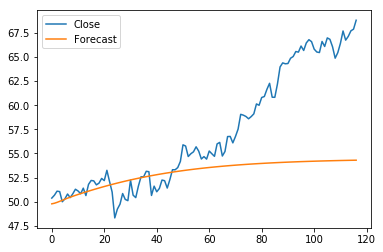

In [192]:
df_JUL_DEC_2019['Forecast'] = forecast_df['Forecast'].values
print(df_JUL_DEC_2019)
df_JUL_DEC_2019.plot()